# Student information

Name: Hoang Tuan Tu

ID: 21000709

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Reading data
data = pd.read_csv('SAT_GPA.csv')
print(data['SAT'])


0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64


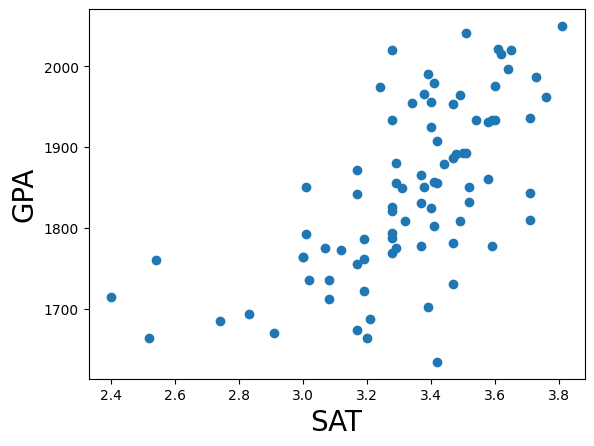

In [3]:
# Visualize data
plt.scatter(data['GPA'], data['SAT'])
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [4]:
# Split SAT data to test and train
X_train = np.array([data['SAT'][:60]]).T
X_test = np.array([data['SAT'][60:]]).T

In [5]:
# Split GPA data to test and train
Y_train = np.array([data['GPA'][:60]]).T
Y_test = np.array([data['GPA'][60:]])

In [6]:
# Building Xbar
one = np.ones((X_train.shape[0], 1))
Xbar = np.concatenate((one, X_train), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, Y_train)
w = np.dot(np.linalg.inv(A), b)
print(w)

[[0.88948508]
 [0.0012857 ]]


In [7]:
# Caculate coef
theta_1 = w[1][0]
theta_0 = w[0][0]
print("Theta_0:", theta_0)
print("Theta_1:", theta_1)

Theta_0: 0.8894850818936354
Theta_1: 0.0012857028103772127


In [8]:
# Predict
y_pred = theta_0 + theta_1 * X_test

In [9]:
# Comparing solution with real label
df = pd.DataFrame({"My Solution" : y_pred.T[0], "Real label" : Y_test[0]})
print(df)

    My Solution  Real label
0      3.414605        3.49
1      3.214036        3.49
2      3.323321        3.50
3      3.513605        3.51
4      3.323321        3.51
5      3.244893        3.52
6      3.268035        3.52
7      3.376034        3.54
8      3.282178        3.58
9      3.372177        3.58
10     3.374749        3.59
11     3.175465        3.59
12     3.428748        3.60
13     3.376034        3.60
14     3.487890        3.61
15     3.480176        3.62
16     3.457034        3.64
17     3.486605        3.65
18     3.259035        3.71
19     3.378606        3.71
20     3.216607        3.71
21     3.444177        3.73
22     3.412034        3.76
23     3.525176        3.81


In [10]:
# Using skit learn
model = LinearRegression()
model.fit(X_train, Y_train)

print(model.coef_[0])
print(model.intercept_)

sklearn_pred = model.predict(X_test)
df['Sklearn solution'] = sklearn_pred

[0.0012857]
[0.88948508]


In [11]:
# Comparing solution
print(df)

    My Solution  Real label  Sklearn solution
0      3.414605        3.49          3.414605
1      3.214036        3.49          3.214036
2      3.323321        3.50          3.323321
3      3.513605        3.51          3.513605
4      3.323321        3.51          3.323321
5      3.244893        3.52          3.244893
6      3.268035        3.52          3.268035
7      3.376034        3.54          3.376034
8      3.282178        3.58          3.282178
9      3.372177        3.58          3.372177
10     3.374749        3.59          3.374749
11     3.175465        3.59          3.175465
12     3.428748        3.60          3.428748
13     3.376034        3.60          3.376034
14     3.487890        3.61          3.487890
15     3.480176        3.62          3.480176
16     3.457034        3.64          3.457034
17     3.486605        3.65          3.486605
18     3.259035        3.71          3.259035
19     3.378606        3.71          3.378606
20     3.216607        3.71       

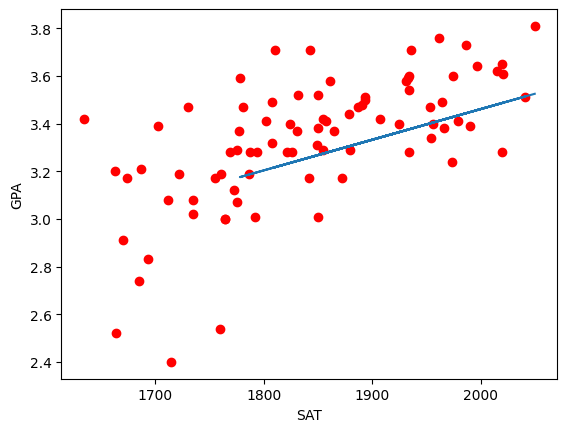

In [12]:
# Draw the fiting line with all data

plt.plot(data['SAT'], data['GPA'], 'ro')
plt.plot(X_test, y_pred)
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

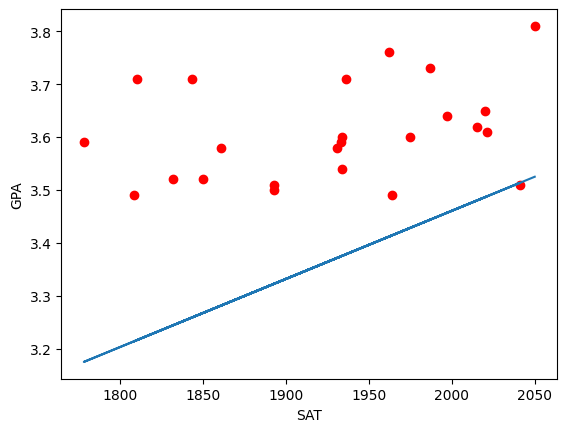

In [13]:
# Draw the fiting line with testing data

plt.plot(X_test.T[0], Y_test[0], 'ro')
plt.plot(X_test, y_pred)
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

In [14]:
# cacaulate sum squaring error
SSE = np.sum((Y_test[0] - y_pred.T[0]) ** 2)
print(SSE)

1.6786863438407986
